In [36]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd

In [37]:
pd.set_option('display.max_rows', 1000)

In [38]:
trainX, trainy, testX, testy = ut.create_dataset()

In [39]:
n_input, n_classes = trainX.shape[1], testy.shape[1]

In [48]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = tf.keras.Sequential()
    model.add(layers.Dense(10,activation='sigmoid', name='layer', input_shape=(n_input,)))
    for i in range(n_layers):
        model.add(layers.Dense(10,activation='sigmoid', name='layer'+str(i), input_shape=(n_input,)))   
    print(i)             
    model.add(layers.Dense(n_classes, activation='softmax', name='layer'+str(i+1)))
    
    # for layer in model.layers: 
    #    print(layer.get_config(), layer.get_weights())
    #    first_layer_weights = model.layers[0].get_weights()[0]
    #     # first_layer_biases  = model.layers[0].get_weights()[1]
    #     # second_layer_weights = model.layers[1].get_weights()[0]
    #     # second_layer_biases  = model.layers[1].get_weights()[1]
    #    second_layer_weights = model.layers[9].get_weights()[0]
    
    #print(first_layer_weights)
    # This builds the model for the first time:
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)  
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc


0
nodes=1: 0.512
1
nodes=2: 0.038
2
nodes=3: 0.038
3
nodes=4: 0.038
4
nodes=5: 0.038
9
nodes=10: 0.038


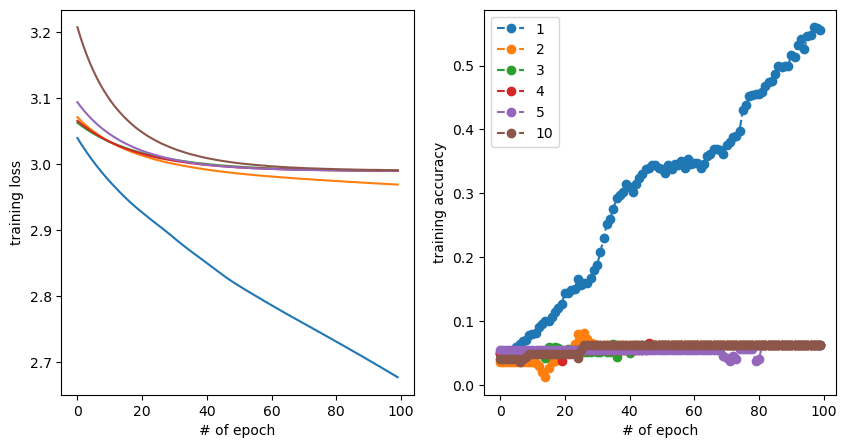

In [49]:
num_layers = [1,2,3,4,5,10]
#num_layers = [100]
plt.figure(figsize=(10,5))
for n_layers in num_layers:
  # evaluate model with a given number of nodes
  history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')

# show the plot

plt.legend()
plt.show()

## Model is capable of learning very well with 1 layer so adding more layers does not improve the performance. 
## Each node has 10 nodes in the hidden layer. 

### Activation function:
    - Sigmoid: 
    - Vanishing gradients: how low is low for vanisging gradients??
    - Relu 
